In [1]:
import pandas as pd

# Loading the data into a DataFrame
data = pd.read_csv(r'C:\Users\admin\Desktop\Sql Project\sort-minRange.csv')

# Displaying the first few rows to understand the structure
print(data.head())

   NORAD_CAT_ID_1       OBJECT_NAME_1  DSE_1  NORAD_CAT_ID_2  \
0           57621  STARLINK-30150 [+]  5.884           31659   
1           57674  STARLINK-30314 [+]  4.253           55108   
2           39091   BRITE-AUSTRIA [+]  6.431           26063   
3           55363   STARLINK-5648 [+]  0.252           25157   
4           56973    SPACEBEE-178 [+]  3.546           57680   

        OBJECT_NAME_2  DSE_2                      TCA  TCA_RANGE  \
0  FENGYUN 1C DEB [-]  5.951  2023-11-15 19:11:49.982      0.010   
1       OBJECT DD [-]  4.535  2023-11-14 05:15:33.971      0.022   
2    OPAL (OO-38) [-]  6.143  2023-11-16 04:14:45.242      0.026   
3             GFO [-]  0.305  2023-11-10 09:20:13.523      0.032   
4  STARLINK-30283 [+]  3.734  2023-11-13 16:46:14.879      0.036   

   TCA_RELATIVE_SPEED  MAX_PROB  DILUTION  
0              14.376  0.021270     0.005  
1              14.413  0.004050     0.012  
2               9.743  0.001938     0.008  
3              13.577  0.02614

In [12]:
#Question 1A: Derive High-Level Analytics for a Single Day
# Total Number of Conjunctions Among Active Satellites

# Calculating the total number of conjunctions
total_conjunctions = len(data)
print("Total Conjunctions Among Active Satellites:", total_conjunctions)

Total Conjunctions Among Active Satellites: 68009


In [15]:
# Convert TCA column to datetime
data['TCA'] = pd.to_datetime(data['TCA'])

# Extract hour from TCA column
data['TCA_hour'] = data['TCA'].dt.hour

# Count conjunctions per hour
conjunctions_per_hour = data['TCA_hour'].value_counts()
print("Conjunctions per Hour:",conjunctions_per_hour)

Conjunctions per Hour: TCA_hour
15    2975
20    2957
13    2937
19    2917
10    2917
22    2872
6     2857
14    2846
9     2846
16    2836
5     2828
12    2822
2     2820
23    2814
3     2810
17    2802
18    2801
0     2794
8     2788
1     2784
4     2783
7     2766
21    2748
11    2689
Name: count, dtype: int64


In [11]:
# Identify the most involved satellites
satellite_1_counts = data['OBJECT_NAME_1'].value_counts()
satellite_2_counts = data['OBJECT_NAME_2'].value_counts()

combined_counts = satellite_1_counts.add(satellite_2_counts, fill_value=0)
most_involved_satellites = combined_counts.nlargest(5)

print("Most Involved Satellites:")
print(most_involved_satellites)

Most Involved Satellites:
FENGYUN 1C DEB [-]     5408.0
COSMOS 2251 DEB [-]    3146.0
CZ-4B DEB [-]          1136.0
UNKNOWN [-]            1129.0
CZ-6A DEB [-]          1015.0
Name: count, dtype: float64


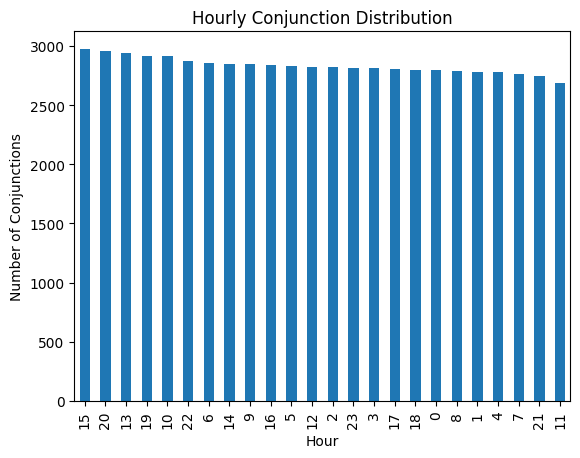

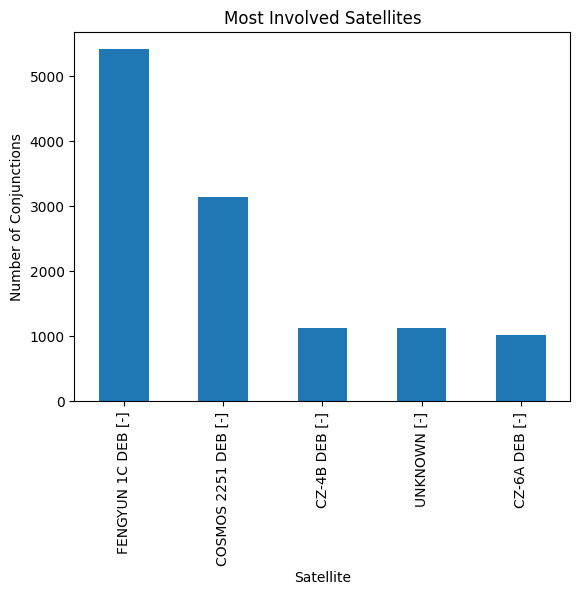

In [29]:
# Plotting hourly conjunctions
conjunctions_per_hour.plot(kind='bar', xlabel='Hour', ylabel='Number of Conjunctions', title='Hourly Conjunction Distribution')
plt.show()

# Plotting most involved satellites
most_involved_satellites.plot(kind='bar', xlabel='Satellite', ylabel='Number of Conjunctions', title='Most Involved Satellites')
plt.show()

In [31]:
# Total number of conjunctions for the specific satellite over the five days
total_conjunctions = len(specific_satellite)
print("Total Conjunctions for the Chosen Satellite over Five Days:", total_conjunctions)

Total Conjunctions for the Chosen Satellite over Five Days: 48


In [33]:
# Assuming 'chosen_satellite_id' represents the NORAD ID of the selected satellite
chosen_satellite_id = 47015  

specific_satellite_data = data[
    (data['NORAD_CAT_ID_1'] == chosen_satellite_id) | (data['NORAD_CAT_ID_2'] == chosen_satellite_id)
]

print("Conjunctions involving the selected satellite:")
print(specific_satellite_data)

Conjunctions involving the selected satellite:
       NORAD_CAT_ID_1            OBJECT_NAME_1  DSE_1  NORAD_CAT_ID_2  \
24              47570        STARLINK-1969 [+]  0.345           47015   
933             38337    GCOM-W1 (SHIZUKU) [+]  7.352           47015   
2926            54866        STARLINK-5398 [+]  0.844           47015   
7499            55459        STARLINK-5669 [+]  6.925           47015   
10212           47795        STARLINK-2347 [+]  1.170           47015   
14036           53611        STARLINK-4650 [+]  7.599           47015   
17390           53046        STARLINK-4331 [+]  1.775           47015   
18618           53590        STARLINK-4689 [+]  4.548           47015   
19535           53597        STARLINK-4682 [+]  6.537           47015   
20495           57119        STARLINK-6150 [+]  5.536           47015   
20562           55673        STARLINK-5463 [+]  6.433           47015   
21480           47798        STARLINK-2379 [+]  4.956           47015   
2419

In [34]:
# Risk Assessment and Decision Support

max_prob = specific_satellite_data['MAX_PROB'].max()
avg_speed = specific_satellite_data['TCA_RELATIVE_SPEED'].mean()

print("Maximum Probability of Collision:", max_prob)
print("Average Relative Speed at Closest Approach:", avg_speed)

Maximum Probability of Collision: 0.004132
Average Relative Speed at Closest Approach: 11.813416666666669


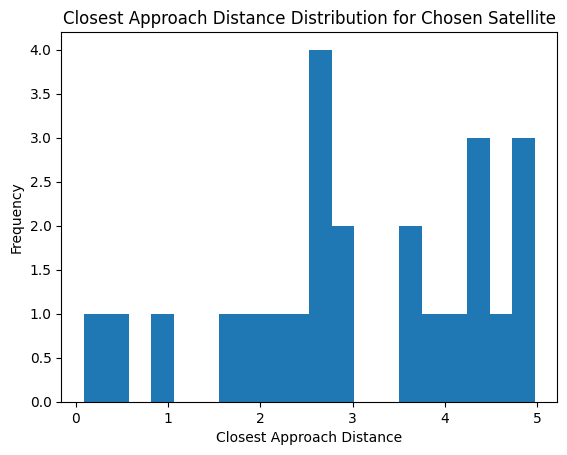

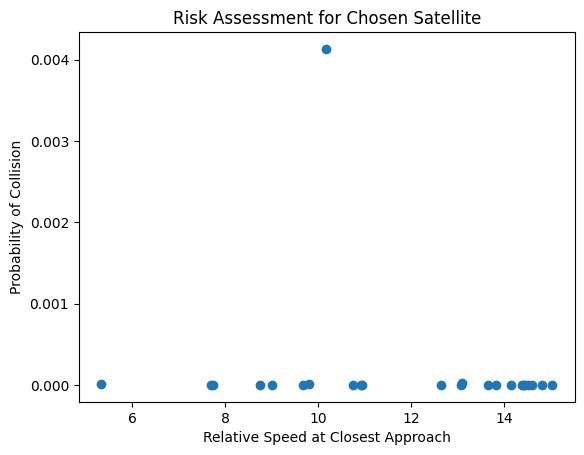

In [35]:
# Visualization example: Plotting closest approach distance distribution
plt.hist(specific_satellite_data['TCA_RANGE'], bins=20)
plt.xlabel('Closest Approach Distance')
plt.ylabel('Frequency')
plt.title('Closest Approach Distance Distribution for Chosen Satellite')
plt.show()

# Additional visualizations (scatter plots) to aid in decision-making
# scatter plotting relative speed against probability of collision
plt.scatter(specific_satellite_data['TCA_RELATIVE_SPEED'], specific_satellite_data['MAX_PROB'])
plt.xlabel('Relative Speed at Closest Approach')
plt.ylabel('Probability of Collision')
plt.title('Risk Assessment for Chosen Satellite')
plt.show()

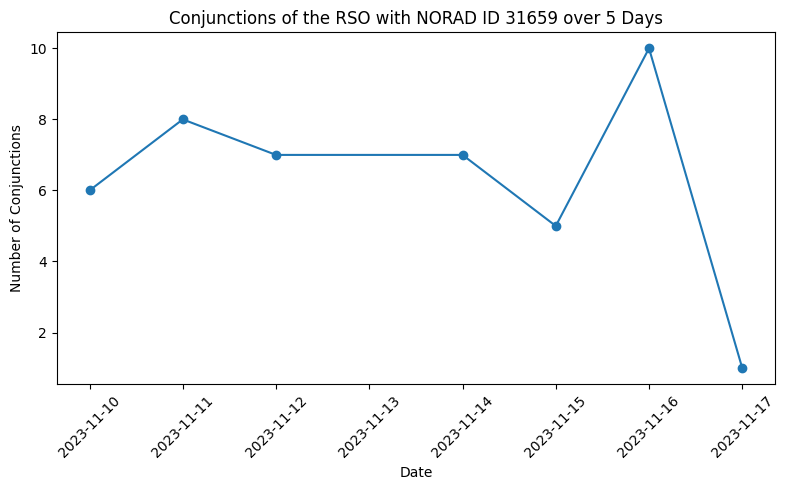

In [57]:
import matplotlib.pyplot as plt

# Convert 'TCA' column to datetime format
data['TCA'] = pd.to_datetime(data['TCA'], format='%H:%M.%S')

# Filter data for the chosen satellite (NORAD ID 57621)
specific_satellite_data = data[
    (data['NORAD_CAT_ID_1'] == 31659) | (data['NORAD_CAT_ID_2'] == 31659)
]

# Group and count conjunctions per day
conjunctions_per_day = specific_satellite_data.groupby(specific_satellite_data['TCA'].dt.date).size()

# Plotting the evolution of conjunctions for the specific satellite
plt.figure(figsize=(8, 5))
plt.plot(conjunctions_per_day.index, conjunctions_per_day.values, marker='o')
plt.title('Conjunctions of the RSO with NORAD ID 31659 over 5 Days')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()